In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the global font size
plt.rcParams['font.size'] = 14

In [25]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('weakening.csv');df

,filename,oldInvariant,expected,sizeOfTrace,numOfPositives,numOfNegatives,solvingTime,formula
0,weakening/w_conseq_3_20_5_5.trace,[](a -> b),[](a -> b || c),20,5,5,5.413,[](a -> (b || c))
1,weakening/w_antec_3_5_60_60.trace,[](a -> b),[](a && c -> b),5,60,60,1.528,[]((a && c) -> b)
2,weakening/w_conseq_11_45_5_5.trace,[](a -> b),[](a -> b || c),45,5,5,TO,-
3,weakening/w_antec_3_10_5_5.trace,[](a -> b),[](a && c -> b),10,5,5,0.742,[]((a && c) -> b)
4,weakening/w_antec_7_5_70_70.trace,[](a -> b),[](a && c -> b),5,70,70,3.69,[]((a && c) -> b)
...,...,...,...,...,...,...,...,...
229,weakening/w_conseq_3_10_5_5.trace,[](a -> b),[](a -> b || c),10,5,5,0.776,[](a -> (b || c))
230,weakening/w_conseq_7_50_5_5.trace,[](a -> b),[](a -> b || c),50,5,5,TO,-
231,weakening/w_conseq_3_85_5_5.trace,[](a -> b),[](a -> b || c),85,5,5,TO,-
232,weakening/w_conseq_7_5_10_10.trace,[](a -> b),[](a -> b || c),5,10,10,0.765,[](a -> (b || c))


In [26]:
# Convert solvingTime to numeric, errors set to 'coerce' will replace non-numeric values with NaN
df['solvingTime'] = pd.to_numeric(df['solvingTime'], errors='coerce')

# Replace NaN values with 180.0
df['solvingTime'].fillna(180.0, inplace=True)

# Extract the number of variables from the filename
df['numOfVariables'] = df['filename'].apply(lambda x: int(x.split('_')[2]))

# Sort the DataFrame
df.sort_values(by=['numOfVariables', 'sizeOfTrace', 'numOfPositives', 'numOfNegatives'], inplace=True)

# Group the DataFrame and compute the average solving time
df = df.groupby(['numOfVariables', 'sizeOfTrace', 'numOfPositives', 'numOfNegatives'])['solvingTime'].mean().reset_index()

df

,numOfVariables,sizeOfTrace,numOfPositives,numOfNegatives,solvingTime
0,3,5,5,5,0.2885
1,3,5,10,10,0.3905
2,3,5,15,15,0.4785
3,3,5,20,20,0.6430
4,3,5,25,25,0.7555
...,...,...,...,...,...
112,11,80,5,5,180.0000
113,11,85,5,5,180.0000
114,11,90,5,5,180.0000
115,11,95,5,5,180.0000


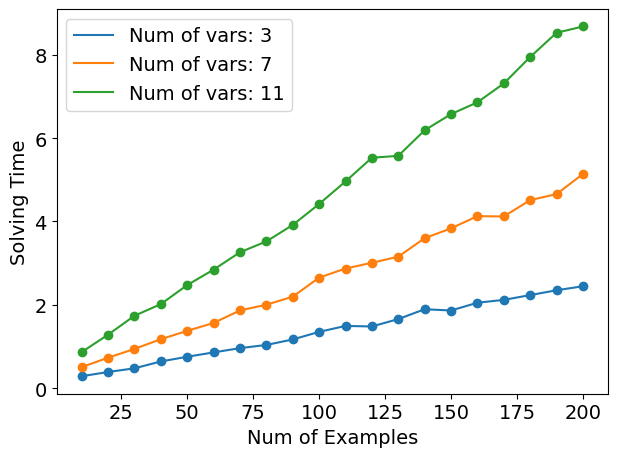

In [33]:
# First Diagram
df1 = df[df['sizeOfTrace'] == 5]

for var in df1['numOfVariables'].unique():
    temp_df = df1[df1['numOfVariables'] == var]
    plt.plot(temp_df['numOfPositives'] + temp_df['numOfNegatives'], temp_df['solvingTime'], label=f'Num of vars: {var}')
    plt.scatter(temp_df['numOfPositives'] + temp_df['numOfNegatives'], temp_df['solvingTime'])

plt.xlabel('Num of Examples')
plt.ylabel('Solving Time')
plt.legend()
plt.tight_layout()
plt.savefig("fig-weakening-eval-examples.png")
plt.show()

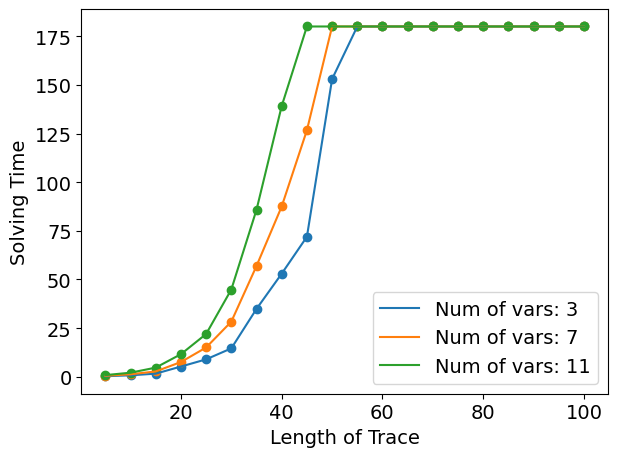

In [34]:
# Second Diagram
df2 = df[(df['numOfPositives'] == 5) & (df['numOfNegatives'] == 5)]

for var in df2['numOfVariables'].unique():
    temp_df = df2[df2['numOfVariables'] == var]
    plt.plot(temp_df['sizeOfTrace'], temp_df['solvingTime'], label=f'Num of vars: {var}')
    plt.scatter(temp_df['sizeOfTrace'], temp_df['solvingTime'])

plt.xlabel('Length of Trace')
plt.ylabel('Solving Time')
plt.legend()
plt.tight_layout()
plt.savefig("fig-weakening-eval-tracelength.png")
plt.show()